<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Lasso_Ridge_Quantile_and_ElasticNet_Regression/blob/master/Precy_Mae_IP_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project Week 7


---



# **1. Defining the Question**

## a) Specifying the Question


## b) Defining the Metric for Success


## c) Understanding the context


## d) Recording the Experimental Design


> 1) Business Understanding: 

> 2) Reading the data: 
> 3) Checking our data: 

> 4) Data cleaning:

> 5) EDA: visualizing and understanding data.

> 6) Implementing the solution: 

> 7) Challenging the solution:

> 8)Conclusion

## e) Data relevance




# **2. Reading the data**

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading our data, top of dataset
df=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Reading bottom of dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#  **3. Checking the data**

In [4]:
# Checking the shape of our data
df.shape

(21613, 20)

Our data has 20 columns and 21613 entries

In [5]:
# Preview our dataset columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Taking a look at the statistical summaries
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There are several minimums of zero which are explainable because there are houses with 0 waterfronts, bedrooms, basements etc.

##  * External Source validation

# **4. Tidying the dataset**

In [7]:
# Data cleaning procedures, fixing column names to lower case
#
df.columns= df.columns.str.strip().str.lower().str.replace(' ','_')
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [8]:
# checking column data types
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All our data types are okay for now, I would just want to convert price to integer.


In [9]:
#  I would like to convert price from float to integer 
#df= pd.DataFrame(range(5), columns=['price'])
df['price'] = df.price.astype('int')
df.dtypes

id                 int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
# Identifying the Missing Data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Our dataset has no missing data

In [11]:
# Checking for unique values per column (consistency and uniformity). To check for any anomalies
for column in df.columns:
  print('\n')
  print(df[column].nunique())
  print(df[column].unique())



21436
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


3625
[221900 538000 180000 ... 541800 610685 402101]


13
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


30
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


1038
[1180 2570  770 ... 3087 3118 1425]


9782
[ 5650  7242 10000 ...  5813  2388  1076]


6
[1.  2.  1.5 3.  2.5 3.5]


2
[0 1]


5
[0 3 4 2 1]


5
[3 5 4 1 2]


12
[ 7  6  8 11  9  5 10 12  4  3 13  1]


946
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 

In [12]:
# Checking for number of unique records per column
for i in df.columns:
 print(" {}    unique values are -----> {}".format(i,len(df[i].unique())))

 id    unique values are -----> 21436
 price    unique values are -----> 3625
 bedrooms    unique values are -----> 13
 bathrooms    unique values are -----> 30
 sqft_living    unique values are -----> 1038
 sqft_lot    unique values are -----> 9782
 floors    unique values are -----> 6
 waterfront    unique values are -----> 2
 view    unique values are -----> 5
 condition    unique values are -----> 5
 grade    unique values are -----> 12
 sqft_above    unique values are -----> 946
 sqft_basement    unique values are -----> 306
 yr_built    unique values are -----> 116
 yr_renovated    unique values are -----> 70
 zipcode    unique values are -----> 70
 lat    unique values are -----> 5034
 long    unique values are -----> 752
 sqft_living15    unique values are -----> 777
 sqft_lot15    unique values are -----> 8689


From the number od unique values in our dataset (especially those with very small values), this could indicate that they are categorical values. like for example waterfront which has 2 unique values.

In [13]:
# Creating categorical features using label encoder
cat_features=["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]
# 
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]= lbl_encoders[feature].fit_transform(df[feature])

## Feature Engineering

In [14]:
# To get the age column, I will first get current year minus year build
import datetime 
df['hse_age']=datetime.datetime.now().year-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age
0,7129300520,221900,3,3,1180,5650,0,0,0,2,5,1180,0,1955,0,66,47.5112,-122.257,1340,5650,65
1,6414100192,538000,3,8,2570,7242,2,0,0,2,5,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,69
2,5631500400,180000,2,3,770,10000,0,0,0,2,4,770,0,1933,0,16,47.7379,-122.233,2720,8062,87
3,2487200875,604000,4,11,1960,5000,0,0,0,4,5,1050,910,1965,0,58,47.5208,-122.393,1360,5000,55
4,1954400510,510000,3,7,1680,8080,0,0,0,2,6,1680,0,1987,0,37,47.6168,-122.045,1800,7503,33


In [15]:
# Creating a column containing yrs since renovation
import datetime 
df['yrs_since_renovation']=datetime.datetime.now().year-df['yr_renovated']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900,3,3,1180,5650,0,0,0,2,5,1180,0,1955,0,66,47.5112,-122.257,1340,5650,65,2020
1,6414100192,538000,3,8,2570,7242,2,0,0,2,5,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000,2,3,770,10000,0,0,0,2,4,770,0,1933,0,16,47.7379,-122.233,2720,8062,87,2020
3,2487200875,604000,4,11,1960,5000,0,0,0,4,5,1050,910,1965,0,58,47.5208,-122.393,1360,5000,55,2020
4,1954400510,510000,3,7,1680,8080,0,0,0,2,6,1680,0,1987,0,37,47.6168,-122.045,1800,7503,33,2020


From the code above, there is a hitch because years since renovation has the current year(2020) for entries which have not had any renovation.

In [16]:
# Fixing the years since renovation containing 2020 to the actual time since renovation(age)
df.loc[df['yrs_since_renovation']== 2020, 'yrs_since_renovation'] =datetime.datetime.now().year -df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900,3,3,1180,5650,0,0,0,2,5,1180,0,1955,0,66,47.5112,-122.257,1340,5650,65,65
1,6414100192,538000,3,8,2570,7242,2,0,0,2,5,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000,2,3,770,10000,0,0,0,2,4,770,0,1933,0,16,47.7379,-122.233,2720,8062,87,87
3,2487200875,604000,4,11,1960,5000,0,0,0,4,5,1050,910,1965,0,58,47.5208,-122.393,1360,5000,55,55
4,1954400510,510000,3,7,1680,8080,0,0,0,2,6,1680,0,1987,0,37,47.6168,-122.045,1800,7503,33,33


In [17]:
# Dropping the columns we do not need
df.drop(['yr_built','yr_renovated','id','long','lat'], axis = 1, inplace= True) 
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900,3,3,1180,5650,0,0,0,2,5,1180,0,66,1340,5650,65,65
1,538000,3,8,2570,7242,2,0,0,2,5,2170,400,55,1690,7639,69,29
2,180000,2,3,770,10000,0,0,0,2,4,770,0,16,2720,8062,87,87


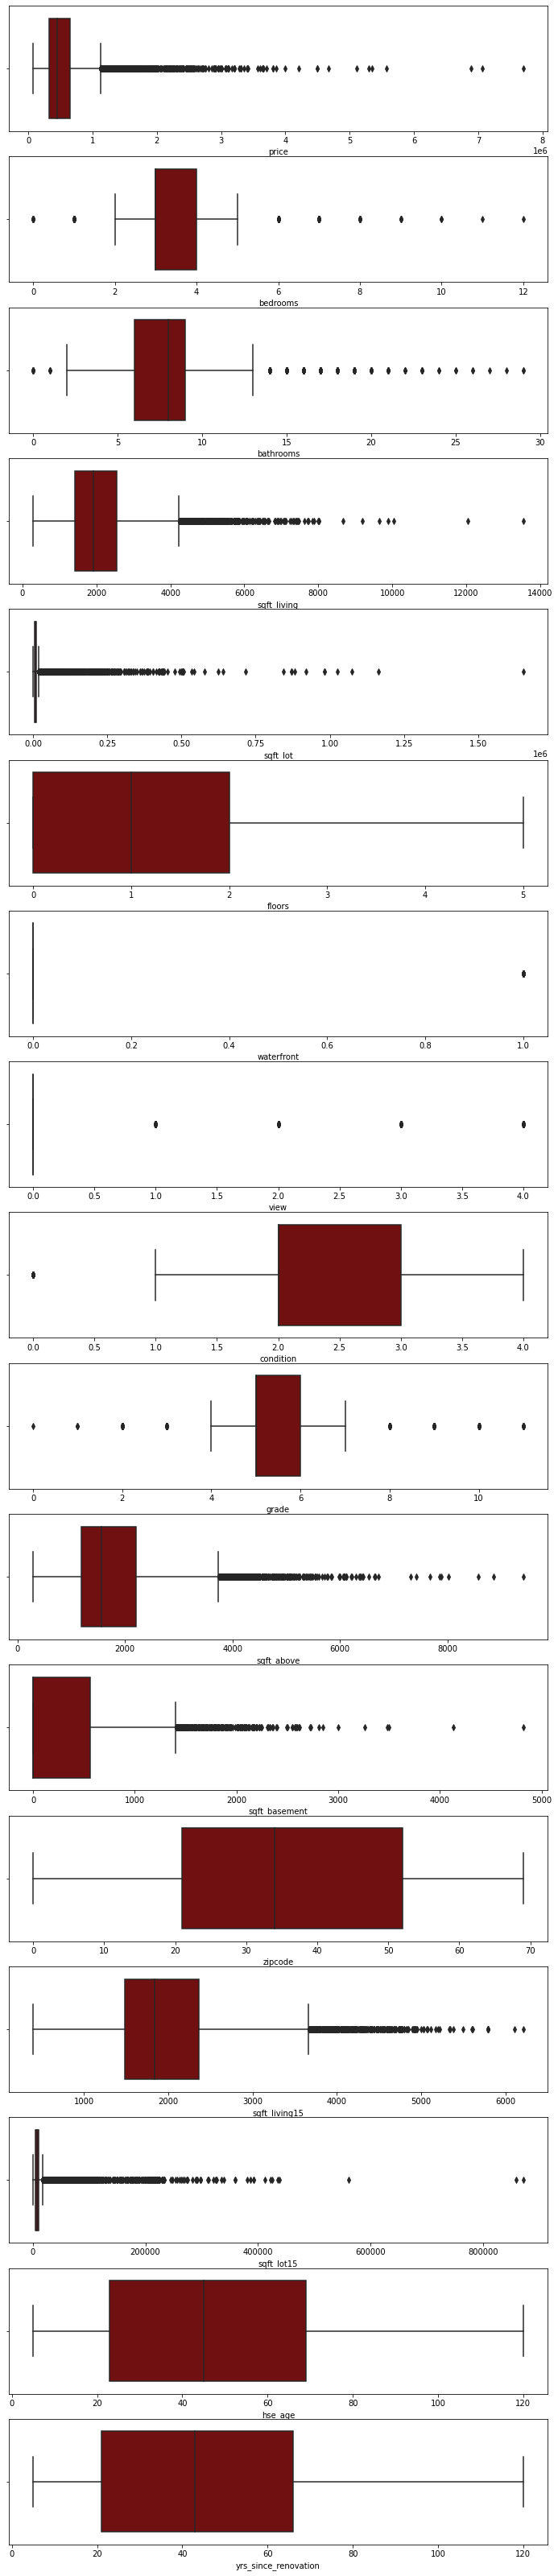

In [18]:
# Checking for outliers using boxplots
fig, ((ax1),(ax2), (ax3),(ax4),(ax5),(ax6),(ax7),(ax8),(ax9),(ax10),(ax11),(ax12),(ax13),(ax14),(ax15),(ax16),(ax17)) = plt.subplots(17 ,figsize=(12, 58))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['price'], ax=ax1, color='maroon')
sns.boxplot(df['bedrooms'], ax=ax2, color='maroon')
sns.boxplot(df['bathrooms'], ax=ax3, color='maroon')
sns.boxplot(df['sqft_living'], ax=ax4, color='maroon')
sns.boxplot(df['sqft_lot'], ax=ax5, color='maroon')
sns.boxplot(df['floors'], ax=ax6, color='maroon')
sns.boxplot(df['waterfront'], ax=ax7, color='maroon')
sns.boxplot(df['view'], ax=ax8, color='maroon')
sns.boxplot(df['condition'], ax=ax9, color='maroon')
sns.boxplot(df['grade'], ax=ax10, color='maroon')
sns.boxplot(df['sqft_above'], ax=ax11, color='maroon')
sns.boxplot(df['sqft_basement'], ax=ax12, color='maroon')
sns.boxplot(df['zipcode'], ax=ax13, color='maroon')
sns.boxplot(df['sqft_living15'], ax=ax14, color='maroon')
sns.boxplot(df['sqft_lot15'], ax=ax15, color='maroon')
sns.boxplot(df['hse_age'], ax=ax16, color='maroon')
sns.boxplot(df['yrs_since_renovation'], ax=ax17, color='maroon')

plt.show()

Our dataset has many outliers, but they all appear relevant as there are very unique houses sometimes so we will not disregard those values and will therefore not remove the outliers.

# **5. Exploratory analysis**

In [19]:
# Previewing our dataset before EDA
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900,3,3,1180,5650,0,0,0,2,5,1180,0,66,1340,5650,65,65
1,538000,3,8,2570,7242,2,0,0,2,5,2170,400,55,1690,7639,69,29
2,180000,2,3,770,10000,0,0,0,2,4,770,0,16,2720,8062,87,87
3,604000,4,11,1960,5000,0,0,0,4,5,1050,910,58,1360,5000,55,55
4,510000,3,7,1680,8080,0,0,0,2,6,1680,0,37,1800,7503,33,33


## **Univariate analysis**

In [35]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'hse_age',
       'yrs_since_renovation'],
      dtype='object')

**Measures of central tendancy**

In [23]:
# Creating a list with my column names to make it easier to create a for loop
all_columns= list(df.columns)
all_columns.remove('bathrooms')
all_columns.remove('bedrooms')
all_columns.remove('floors')
all_columns.remove('waterfront')
all_columns.remove('view')
all_columns.remove('condition')
all_columns.remove('grade')
all_columns.remove('zipcode')

#
columns= list(df.columns)
columns.remove('sqft_living')	
columns.remove('sqft_lot')
columns.remove('sqft_above') 
columns.remove('sqft_basement') 
columns.remove('sqft_living15') 
columns.remove('sqft_lot15') 
columns.remove('hse_age') 
columns.remove('yrs_since_renovation') 


In [24]:
#Getting the median
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].median()))



price:450000.0


sqft_living:1910.0


sqft_lot:7618.0


sqft_above:1560.0


sqft_basement:0.0


sqft_living15:1840.0


sqft_lot15:7620.0


hse_age:45.0


yrs_since_renovation:43.0


In [25]:
# Getting the mode
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].mode()))



price:0    350000
1    450000
dtype: int64


sqft_living:0    1300
dtype: int64


sqft_lot:0    5000
dtype: int64


sqft_above:0    1300
dtype: int64


sqft_basement:0    0
dtype: int64


sqft_living15:0    1540
dtype: int64


sqft_lot15:0    5000
dtype: int64


hse_age:0    6
dtype: int64


yrs_since_renovation:0    6
dtype: int64


In [27]:
# Getting the standard deviation
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].std()))



price:367362.2317180084


sqft_living:918.4408970468115


sqft_lot:41420.51151513548


sqft_above:828.0909776519169


sqft_basement:442.5750426774682


sqft_living15:685.3913042527776


sqft_lot15:27304.17963133851


hse_age:29.37341080238659


yrs_since_renovation:28.8068539591556


In [28]:
# Getting the range of each numerical column
#
def calculating_range(column):
  maximum= df[column].max()
  minimum=df[column].min()
  column_range= maximum-minimum
  return column_range

for column in all_columns:
  print('\n')
  print(column+ ':'+ str(calculating_range(column)))



price:7625000


sqft_living:13250


sqft_lot:1650839


sqft_above:9120


sqft_basement:4820


sqft_living15:5811


sqft_lot15:870549


hse_age:115


yrs_since_renovation:115


In [29]:
# Getting the Skewness and Kurtosis
for column in all_columns:
  print('\n')
  print(column+ ', Skewness: '+str(df[column].skew()))
  print(column+ ', Kurtosis: '+str(df[column].kurt()))



price, Skewness: 4.021715573048684
price, Kurtosis: 34.522444410072566


sqft_living, Skewness: 1.471555426802092
sqft_living, Kurtosis: 5.24309298981711


sqft_lot, Skewness: 13.060018959031755
sqft_lot, Kurtosis: 285.0778196973658


sqft_above, Skewness: 1.4466644733818372
sqft_above, Kurtosis: 3.40230362139787


sqft_basement, Skewness: 1.5779650555996247
sqft_basement, Kurtosis: 2.7155742114129353


sqft_living15, Skewness: 1.1081812758966967
sqft_living15, Kurtosis: 1.5970958104616884


sqft_lot15, Skewness: 9.506743246764398
sqft_lot15, Kurtosis: 150.76311004626973


hse_age, Skewness: 0.4698053988143735
hse_age, Kurtosis: -0.657407504733523


yrs_since_renovation, Skewness: 0.5564821591712622
yrs_since_renovation, Kurtosis: -0.5275956070148355


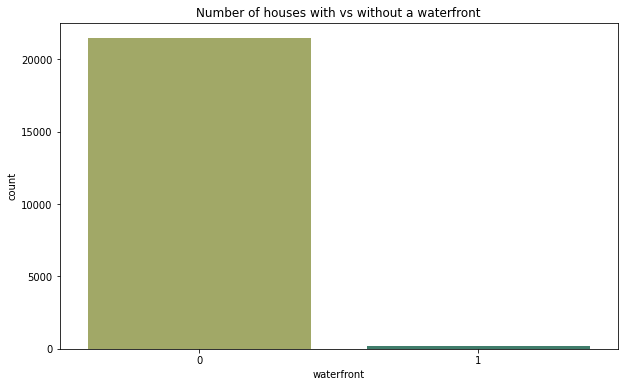

In [35]:
# Visualizing the frequency of number of houses with and without a waterfront
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['waterfront'], palette='gist_earth_r' )
plt.title('Number of houses with vs without a waterfront')
plt.show()


There are far many houses without a waterfront than those with a waterfront.

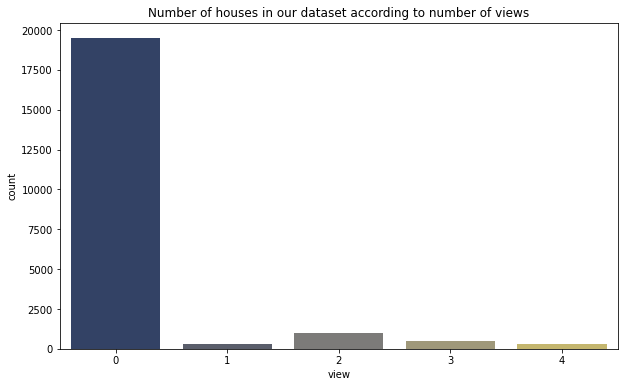

In [45]:
# Number of houses in our dataset according to number of views
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['view'], palette='cividis' )
plt.title('Number of houses in our dataset according to number of views')
plt.show()

Most houses have no view and the most popular houses are those with 2 views

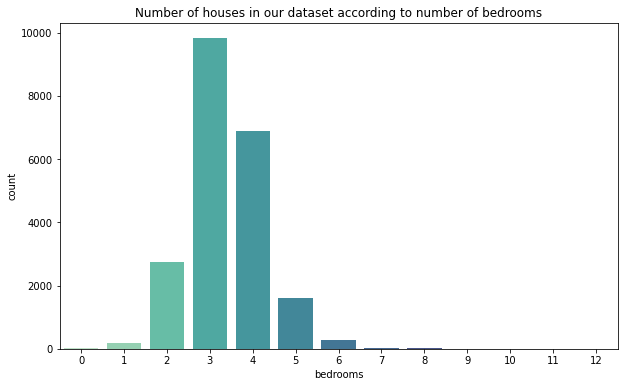

In [40]:
#  Number of houses according to number of bedrooms
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'], palette='mako_r' )
plt.title('Number of houses in our dataset according to number of bedrooms')
plt.show()

3 bedrooms are most recorded followed by 4 bedrooms. This could imply a high demand for the two types compared to any other numbers of bedrooms.

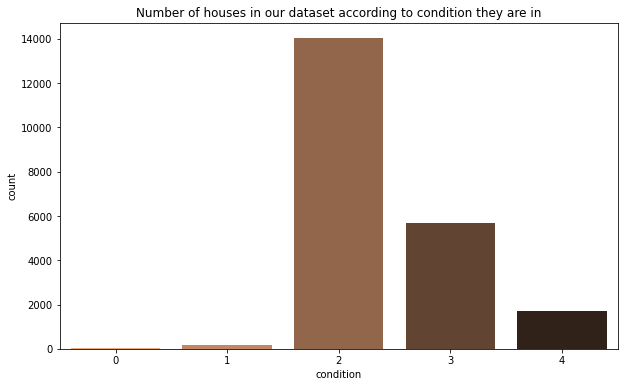

In [46]:
# Number of houses in our dataset according to condition they are in
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['condition'], palette='copper_r' )
plt.title('Number of houses in our dataset according to condition they are in')
plt.show()

Most houses are of condition two

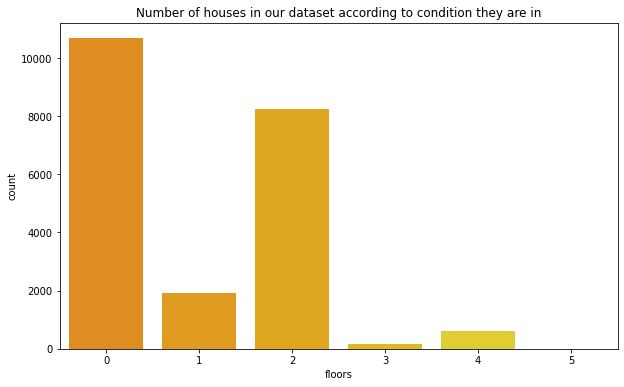

In [47]:
# Number of houses in our dataset according to number of floors
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['floors'], palette='Wistia_r' )
plt.title('Number of houses in our dataset according to number of floors')
plt.show()

Most houses have no floors followed by those with two floors.

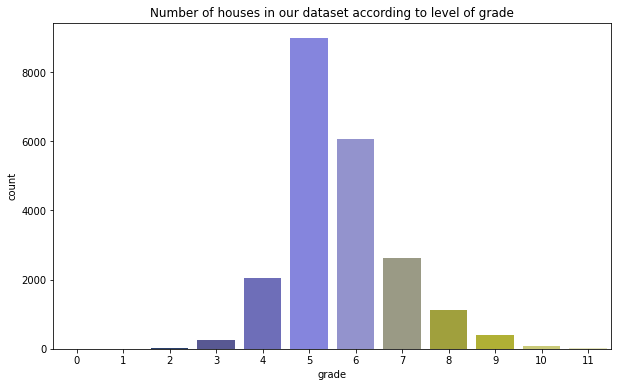

In [52]:
# Number of houses in our dataset according to level of grade
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df['grade'], palette='gist_stern' )
plt.title('Number of houses in our dataset according to level of grade')
plt.show()

The most popular grade is the grade number 5

## **Bivariate analysis**

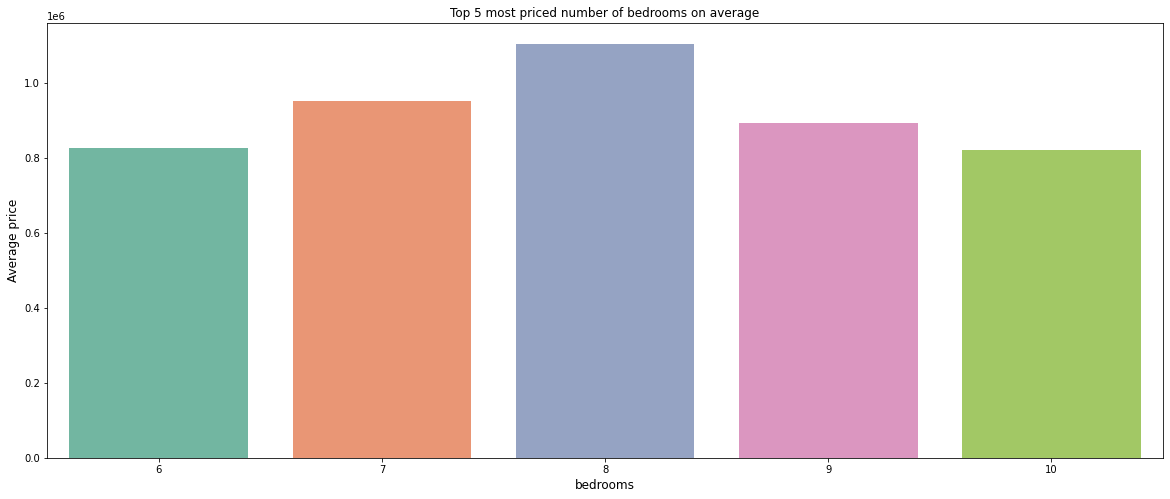

In [62]:
# Finding the highest priced number of bedrooms on average
bedroom_prices=df.groupby('bedrooms')['price'].mean().sort_values(ascending=False).head(5)
#
#
plt.figure(figsize=(20,8))
sns.barplot(bedroom_prices.index, bedroom_prices.values, palette='Set2')
plt.title('Top 5 most priced number of bedrooms on average')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('bedrooms', fontsize=12, )
plt.show()

The highest priced house is the 8 bedroomed house on average followed by the 7 bedroomed houses.

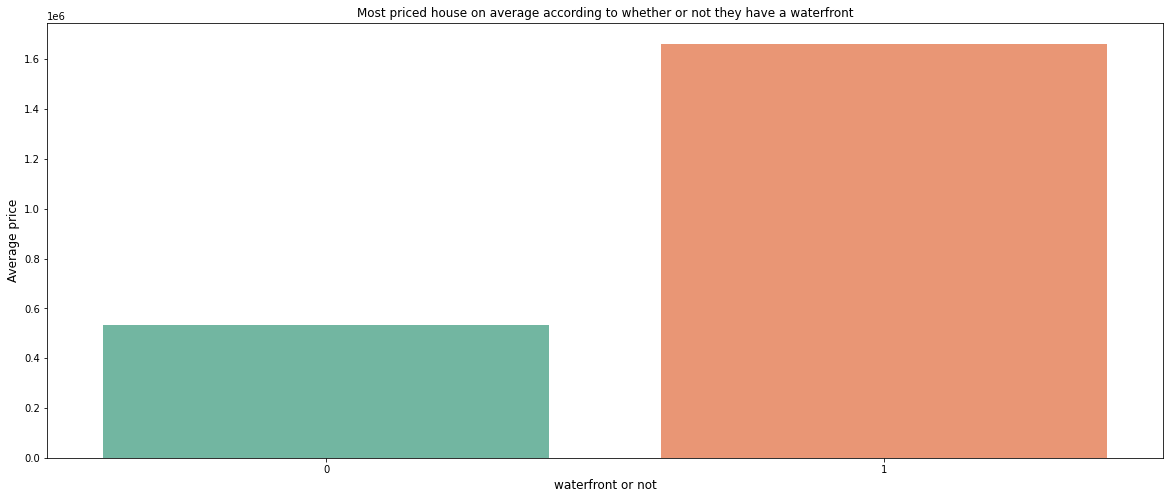

In [72]:
# Most priced house on average according to whether or not they have a waterfront
w_prices=df.groupby('waterfront')['price'].mean().sort_values(ascending=False)
#
#
plt.figure(figsize=(20,8))
sns.barplot(w_prices.index, w_prices.values, palette='Set2')
plt.title('Most priced house on average according to whether or not they have a waterfront')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('waterfront or not', fontsize=12, )
plt.show()

Houses with a waterfront are priced more on average compared to those without a waterfront

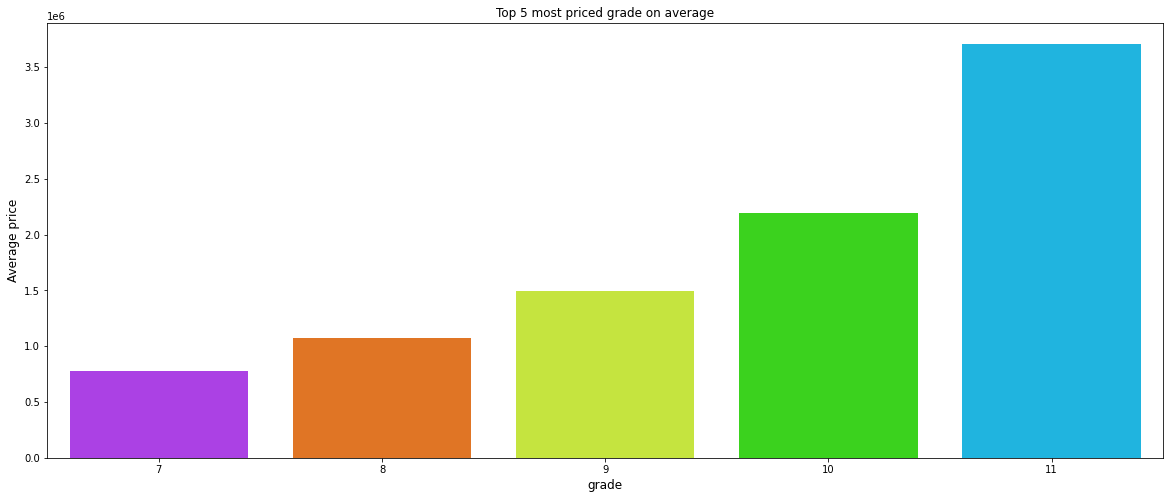

In [73]:
# Finding the most priced grades on average
g_prices=df.groupby('grade')['price'].mean().sort_values(ascending=False).head(5)
#
#
plt.figure(figsize=(20,8))
sns.barplot(g_prices.index, g_prices.values, palette='gist_ncar_r')
plt.title('Top 5 most priced grade on average')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('grade', fontsize=12, )
plt.show()

The most priced grade on average is grade 11 followed by grade 10

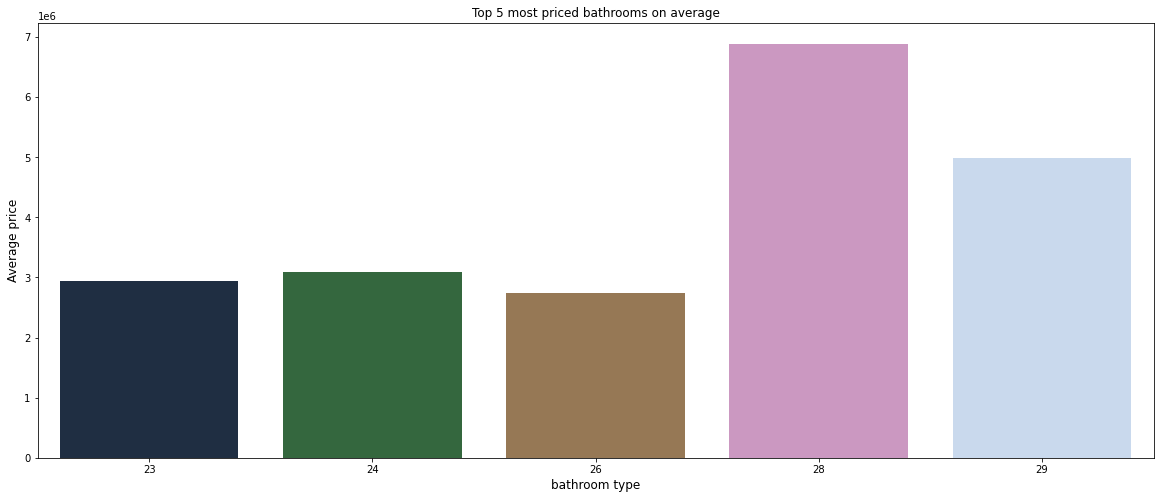

In [76]:
# Finding the most priced bathroom types
bath_prices=df.groupby('bathrooms')['price'].mean().sort_values(ascending=False).head(5)
#
#
plt.figure(figsize=(20,8))
sns.barplot(bath_prices.index, bath_prices.values, palette='cubehelix')
plt.title('Top 5 most priced bathrooms on average')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('bathroom type', fontsize=12, )
plt.show()

The most priced athroom type is the type 28 bathroom

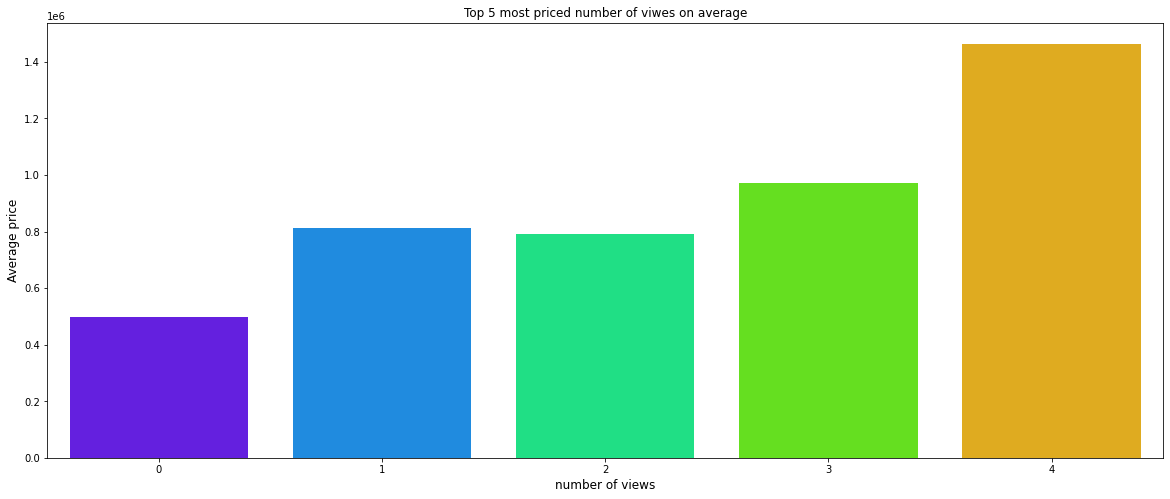

In [81]:
# Finding the most priced houses according to number of views types
v_prices=df.groupby('view')['price'].mean().sort_values(ascending=False).head(5)
#
#
plt.figure(figsize=(20,8))
sns.barplot(v_prices.index, v_prices.values, palette='gist_rainbow_r')
plt.title('Top 5 most priced number of viwes on average')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('number of views', fontsize=12, )
plt.show()

The most priced house on average is that with 4 views followed by 3 views

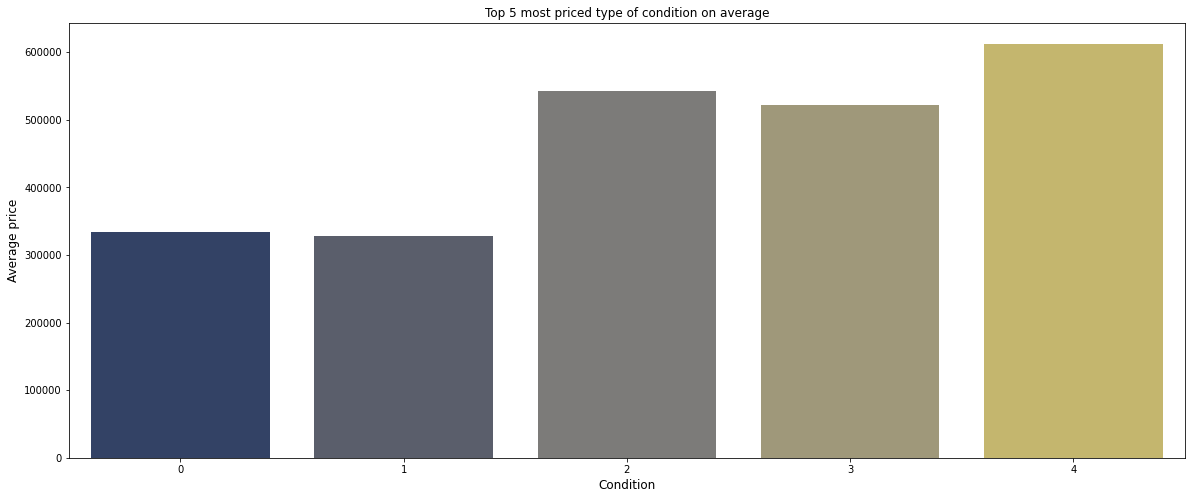

In [83]:
c_prices=df.groupby('condition')['price'].mean().sort_values(ascending=False).head(5)
#
#
plt.figure(figsize=(20,8))
sns.barplot(c_prices.index, c_prices.values, palette='cividis')
plt.title('Top 5 most priced type of condition on average')
plt.ylabel('Average price', fontsize=12)
plt.xlabel('Condition', fontsize=12, )
plt.show()

The most priced house on average is that of condition 4 on average

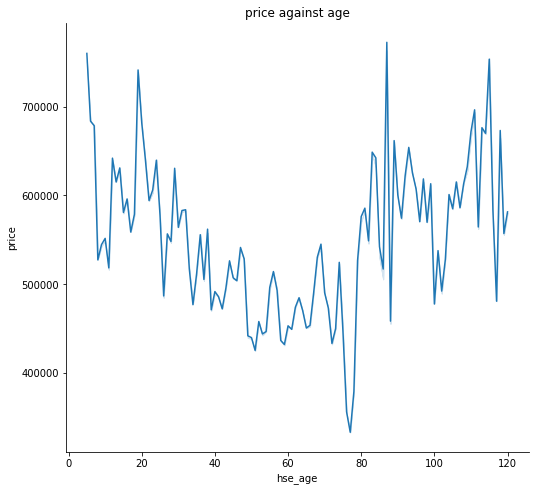

In [86]:
# A Line graph showing volatility of price and age
g=sns.relplot(x='hse_age',y='price',data=df, kind='line', sort= True,ci=False)
plt.title('price against age')
g.fig.set_figwidth(8.27)
g.fig.set_figheight(7)

The prices of houses according to age varies widely, this could be due to the various factors like condition, number of bedrooms etc. Which we will explore in multivariate analysis.

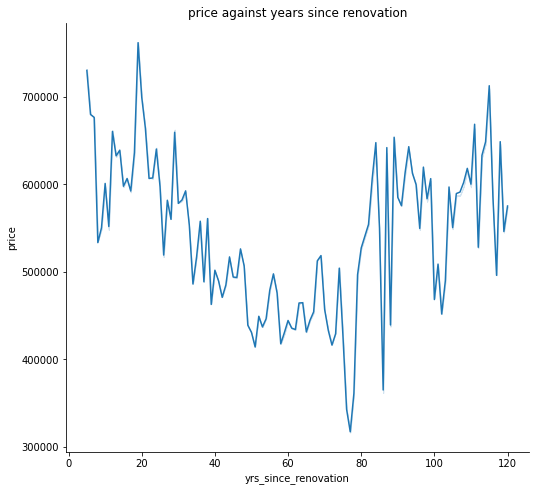

In [88]:
# # A Line graph showing volatility of price and yeras since renovation
g=sns.relplot(x='yrs_since_renovation',y='price',data=df, kind='line', sort= True,ci=False)
plt.title('price against years since renovation')
g.fig.set_figwidth(8.27)
g.fig.set_figheight(7)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'hse_age',
       'yrs_since_renovation'],
      dtype='object')

## **Multivariate analysis**

# **6. Implementing the solution (Regression)**

### Standardization

In [350]:
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'hse_age',
       'yrs_since_renovation']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

## Feature Selection

In [351]:
# To understand which are the most important features
X= df.loc[:, df.columns != 'price']

Y= df.iloc[:, df.columns == 'price']
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [352]:
print(model.feature_importances_)

[0.01418872 0.04812604 0.18741982 0.01871211 0.01204722 0.04043547
 0.03947918 0.01383014 0.25595912 0.06454916 0.02069448 0.06117631
 0.11086755 0.02036859 0.05871818 0.0334279 ]


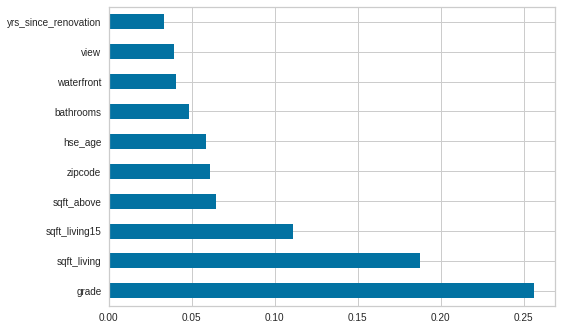

In [353]:
# To plot graph of the top ten features that influence house price
feat_importances= pd.Series(model.feature_importances_, index= X.columns)
# You can take the top five important features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The most important factor affecting house price is the house grade followed by sqft living and sqft living of the 15 nearest houses

In [354]:
# We will therefore use only the ten features selected above
cols=['yrs_since_renovation','view','waterfront','bathrooms','hse_age','zipcode','sqft_above','sqft_living15','sqft_living','grade','price']
dfh=df[cols]

In [355]:
# Let as take a look at the statistical measures of our dataframe h
dfh.describe()

,yrs_since_renovation,view,waterfront,bathrooms,hse_age,zipcode,sqft_above,sqft_living15,sqft_living,grade,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04
mean,7.287209e-16,0.234303,0.007542,7.459122,-7.204096e-16,35.146995,3.892022e-16,-1.506632e-16,3.174253e-16,5.656919,5.401822e+05
std,1.000023e+00,0.766318,0.086517,3.076836,1.000023e+00,19.246708,1.000023e+00,1.000023e+00,1.000023e+00,1.175216,3.673622e+05
min,-1.444620e+00,0.000000,0.000000,0.000000,-1.497813e+00,0.000000,-1.809494e+00,-2.316325e+00,-1.948891e+00,0.000000,7.500000e+04
25%,-8.891833e-01,0.000000,0.000000,6.000000,-8.849999e-01,21.000000,-7.226314e-01,-7.244971e-01,-7.108948e-01,5.000000,3.219500e+05
50%,-1.254585e-01,0.000000,0.000000,8.000000,-1.360059e-01,34.000000,-2.758102e-01,-2.138280e-01,-1.849914e-01,5.000000,4.500000e+05
75%,6.729810e-01,0.000000,0.000000,9.000000,6.810785e-01,52.000000,5.091458e-01,5.448802e-01,5.118578e-01,6.000000,6.450000e+05
max,2.547578e+00,4.000000,1.000000,29.000000,2.417383e+00,69.000000,9.204044e+00,6.162239e+00,1.247807e+01,11.000000,7.700000e+06


### Multicollinearity

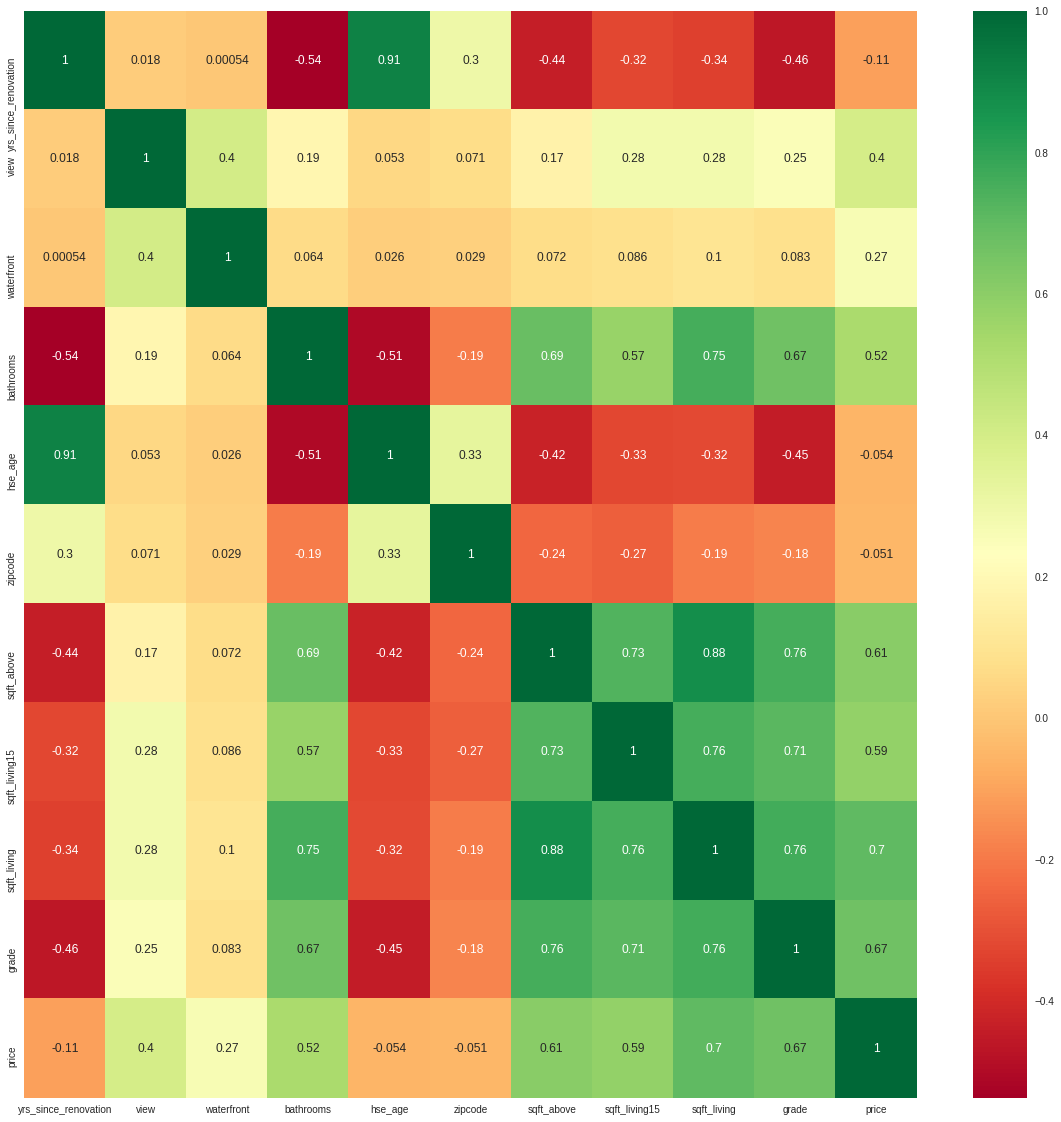

In [356]:
corrmat= dfh.corr()
top_corr_features= corrmat.index
#
plt.figure(figsize=(20,20))
# Plot heatmap
g=sns.heatmap(dfh[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [357]:
# Check the VIF score of each variable diagonally
pd.DataFrame(np.linalg.inv(corrmat.values), index = corrmat.index, columns=corrmat.columns)


,yrs_since_renovation,view,waterfront,bathrooms,hse_age,zipcode,sqft_above,sqft_living15,sqft_living,grade,price
yrs_since_renovation,6.154764,0.059289,0.077366,0.685661,-5.214203,-0.049194,0.234814,-0.255879,-0.311694,0.245083,0.025741
view,0.059289,1.428331,-0.460951,0.004559,-0.131081,-0.116980,0.482226,-0.276036,-0.365306,-0.082571,-0.272780
waterfront,0.077366,-0.460951,1.253474,0.052314,0.045380,0.009400,-0.103022,0.074495,0.166088,0.197928,-0.396963
bathrooms,0.685661,0.004559,0.052314,3.010309,0.365868,-0.053249,0.305669,0.219134,-2.038707,-0.201689,-0.252617
hse_age,-5.214203,-0.131081,0.045380,0.365868,6.364770,-0.294104,0.430070,0.258595,-0.542070,0.633682,-0.828819
zipcode,-0.049194,-0.116980,0.009400,-0.053249,-0.294104,1.191765,0.112116,0.334990,0.003134,-0.188022,-0.029224
sqft_above,0.234814,0.482226,-0.103022,0.305669,0.430070,0.112116,5.315812,-0.545623,-3.813413,-0.698877,-0.026710
sqft_living15,-0.255879,-0.276036,0.074495,0.219134,0.258595,0.334990,-0.545623,2.835035,-1.037755,-0.774620,-0.104642
sqft_living,-0.311694,-0.365306,0.166088,-2.038707,-0.542070,0.003134,-3.813413,-1.037755,7.390820,-0.340023,-0.936769
grade,0.245083,-0.082571,0.197928,-0.201689,0.633682,-0.188022,-0.698877,-0.774620,-0.340023,3.619437,-1.164376


There is high correlation in very essential features like house age, yrs since renovation and squarefoot living. 
To treat multicollinearity we could have droped these columns but having them is essential to making our prediction.

##  Multiple Linear Regression

In [358]:
# Get your dependent and independent variable
X= dfh.loc[:, dfh.columns!='price']

y= dfh.iloc[:, dfh.columns == 'price']

In [359]:
# Splitting our model to train and test model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [360]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [361]:
from sklearn.metrics import mean_squared_error
print("linear R score:", linear.score(X_test, y_test)) 
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("linear coef:", linear.coef_)

linear R score: 0.6588417098077766
linear MSE: 48433175547.436104
linear coef: [[-2.21792123e+03  4.53727462e+04  5.69148426e+05  9.50065123e+03
   1.06798544e+05  1.71259932e+02  5.83963500e+03  1.49693964e+04
   1.19637410e+05  1.30111613e+05]]


* Our Linear model has 65% accuracy which is a bit low.

* Our Linear model has an MSE of 48433175547.436104 which is greater than 10% of price mean, meaning that it did not perform that well in that regard.

In [362]:
# Allowing our model to predict our X test to be able to visualize how well it performed
linear= linear.predict(X_test)

Text(0.5, 1.0, '           prediction difference between actual vs predicted price')

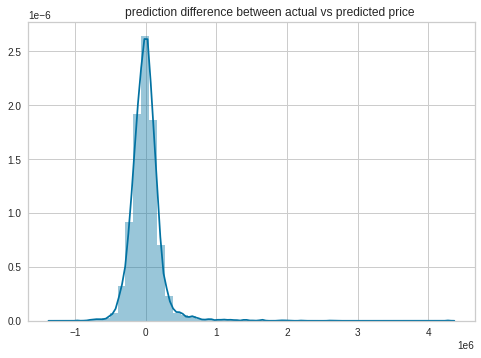

In [363]:
# Plotting  predictions for linear regression
import seaborn as sns
sns.distplot(y_test-linear)
plt.title("           prediction difference between actual vs predicted price")

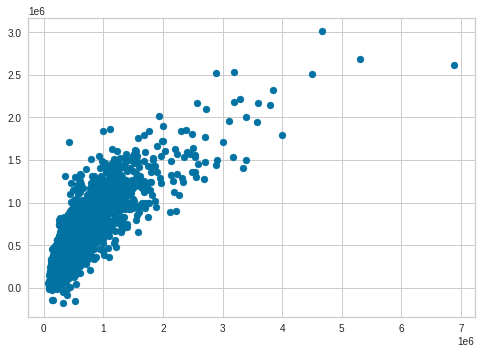

In [364]:
plt.scatter(y_test, linear)

## Quantile Regression



---

Lets first test for Heteroskedasticity

In [365]:
# We now create the residual by substracting the test value from the predicted X_test in the linear regression model

residuals = np.subtract(linear, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals.mean())

price   -251.809292
dtype: float64


price   -251.809292
dtype: float64


ValueError: ignored

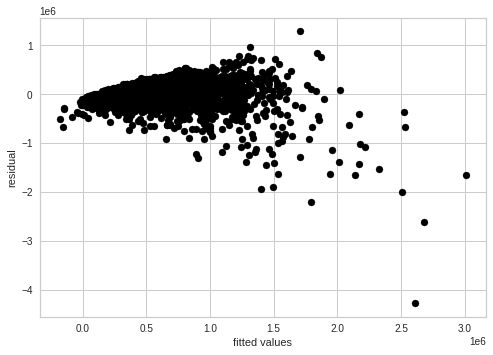

In [372]:
# We now create the residual by substracting the test value from the predicted X_test in the linear regression model

residuals = np.subtract(linear, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals.mean())
# Lets now visualize our residuals
import matplotlib.pyplot as plt
plt.scatter(linear, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(numeric_only=True), color='red', linewidth=1)
plt.show()

In [ ]:
# Get your dependent and independent variable
import numpy as np

noise = np.random.normal(0,1,10)
x= dfh.loc[:, dfh.columns != 'price']+ noise
noise1= np.random.normal(0,1,1)
y= dfh.iloc[:, dfh.columns == 'price']+noise1

In [ ]:
# To show quantile regression results in form of percentiles
import statsmodels.formula.api as smf
# 
mod=smf.quantreg('y~X',df)
q1=mod.fit(q=0.1)
q5=mod.fit(q=0.5)
q9=mod.fit(q=0.9)

# print summary of the model
print("10th Percentile")
print(q1.summary())
print("")
print("50th Percentile")
print(q5.summary())
print("")
print("90th Percentile")
print(q9.summary())

The percentile with the highest r squared is the 90th percentile (51.47) which is lower in terms of perfomance compared to the Linear Regression which was 65.8

## Ridge Regression

In [ ]:
# Using lasso regression on our model and choosing the regularization parameter with the help of GridSearch. 
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
gridridge = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='r2',cv=10)

In [ ]:
#
# ridge = Ridge(normalize=True,alpha=0.01)
gridridge.fit(X_train,y_train)

# model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print("Ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("Ridge score:", gridridge.score(X_test, y_test))

In [ ]:
# Showing the coefficients of our variables by ridge regression,
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,dfh.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
# Allowing our model to predict our X test to be able to visualize how well it performed
gridridge= gridridge.predict(X_test)

In [ ]:
# Plotting  predictions for ridge
import seaborn as sns
sns.distplot(y_test-gridridge)

## Lasso Regression

In [ ]:
# Building our model
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
lasso = linear_model.Lasso(normalize=True) 
gridlasso = GridSearchCV(lasso, param_grid={'alpha':np.logspace(0,20,1)}, scoring ='r2') 


In [ ]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)
#
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso R score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Our lasso coefficients have not all been reduced to zero but a few, those with coefficients large enough, like say 50,000 were spared.

## Elastic Net Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# creating our base elastic Net Model
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Mse without finding our hyperparameters
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

In [ ]:
# The hyperparameters gotten were alpha of 0.00001 and an l1 ratio of 0.8

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("MSE Elastic Net:",second_model)
print("")

The MSE of our second model has reduced substantially after including our hyperparameters.

In [ ]:
# Visualizing the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

None of our model variables have been entirely removed by elastic net which is amazing

In [ ]:
elastic= elastic.predict(X_test)
elastic

In [ ]:
dfa=pd.DataFrame(data=elastic,columns=["Predicted"])
dfa.head(3)

In [ ]:
dfb=pd.DataFrame(data=y_test,columns=["Actual"])
dfb.head()

,price
3834,349950.0
1348,450000.0
20366,635000.0
16617,355500.0
20925,246950.0
...,...
7148,738000.0
2747,726000.0
15565,560000.0
21238,299000.0


In [ ]:
df_final = pd.DataFrame({'Actual': y_test, 'Predicted': dfa['Predicted']})
df_final

In [336]:
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("A Graph representing the actual and predicted")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-336-f07202486c72>", line 6, in <module>
    plt.show()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py", line 272, in show
    return _show(*args, **kw)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/display.py", line 306, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py", line 173, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py", line 217, in catch_format_error

KeyboardInterrupt: ignored

# **7. Challenging the solution**